Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = "NONE"

# Python arrays : Numpy

**REF:** Scipy tutorial and A primer of Scientific Programming with Python. 

The numerical python package, `numpy`, allows for easy and efficient manipulation of vectorial data. In this context, it is important to remark some of the so-called `vectorial` computation. Let's give an example. Imagine a two dimensional vector $a$. How would you represent it using python? You coul use either a list, a tuple, etc:

    a1 = [x, y]
    a2 = (x, y)
    
Of course, it can be  generalized to more dimensions:

    a1 = [x, y, z, w]
    a2 = [0.0, -0.9, 1, -3, 9, ... , 90]
   
Managing vectors by using these typical python constructs is very good from a general programmer point of view, but it has its costs. For example, iterating over a lits by means of a for loop could be very slow. Actually, for typical problemas of computational mathematics and physics, only homogeneous storage structs with fast access are needed, like the arrays of languages like c++, fortran, etc. Arrays might be more limited than general lists, but could vastly outperform lists and tuples for vectorial computations. The `numpy` package provides array like structs to perform fast mathematical operations on numerical data.

Furthermore, vectorial operations are natural on numpy arrays. But what is a vectorial operation? Let's assume we have a vector $v$ of $n$-components. What would be the meaning of something like
    u = sin(v)
? in the context of vectorial computing, it would mean to apply the function `sin` to every component of the vector `v`, therefore $u_i = \sin(v_i)$. In general, given a function $f$, the expression $u = f(v)$ means $u_i = f(v_i)$. Numpy allows for this kind of computing. What would be the meaning of 
    u = v^2*cos(v)*e^v + 2
?

REFS:
- https://jalammar.github.io/visual-numpy/
- https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d

## Basic numpy
Try the following code snippet:

In [8]:
import numpy as np
data = np.array([[1,2,3],[4, 5, 6]])
print(data.shape)
#data = data.reshape((3, 2))
#print(data)
#print(data.shape)
print(data.transpose())
print(data.shape)

(2, 3)
[[1 4]
 [2 5]
 [3 6]]
(2, 3)


In [13]:
data = 5*np.ones([2,3,2])
print(data)
print(data.shape)

[[[5. 5.]
  [5. 5.]
  [5. 5.]]

 [[5. 5.]
  [5. 5.]
  [5. 5.]]]
(2, 3, 2)


In [16]:
data = np.array([[1,2],[3,4],[5,6]])
print(data[1,:])

[3 4]


In [ ]:
import numpy as np
a = np.array([0, 1.0, '3', 5])
print (a)
a.dtype

This means: we are importing the numpy package with the name np. Then, we create an numpy array by using the `np.array` function from a list of values, and assign the result to the variable `a`. What is `a`? use `a?` . The array `a` has several attributes which you can use later, like the shape and type of the internal data. 

Let's now compare the efficiency of a list versus a numpy array, by means of the %timeit magic function of ipython:

In [19]:
L = range(100000)
%timeit [i**2 for i in L]

21.6 ms ± 467 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
a = np.arange(100000)
%timeit np.square(a)

28.7 µs ± 486 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


You can extract some info like the shape and the dimension as 

In [23]:
a.ndim

1

In [24]:
a.shape

(100000,)

In [25]:
a.dtype

dtype('int64')

### Alternative ways to create arrays

    a = np.arange(10)
    b = np.arange(1, 9, 2)
    
The function `linspace` is very useful. It allows to create a uniform partition on a given interval for a given number of points. For example, to create an array of 100 points uniformly on the interval [2, 3], you can use  

In [30]:
a = np.linspace(2, 3, 4)
print (a)
print(a.shape)
print(a.dtype)

[2.         2.33333333 2.66666667 3.        ]
(4,)
float64


In [32]:
# Check the memory address
print(a[0].data, a[1].data, a[2].data)

<memory at 0x127ead620> <memory at 0x127ead6c0> <memory at 0x127ead760>


Check the documentation.

You can also create several other types of useful arrays like

In [33]:
a = np.ones((3, 4)) # shape is a tuple
print (a)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [44]:
np.random.seed(2)
a = np.random.rand(4)
print (a)

[0.4359949  0.02592623 0.54966248 0.43532239]


## Indexing and slicing

Numpy allows for powerfull and efficient access to internal members of arrays

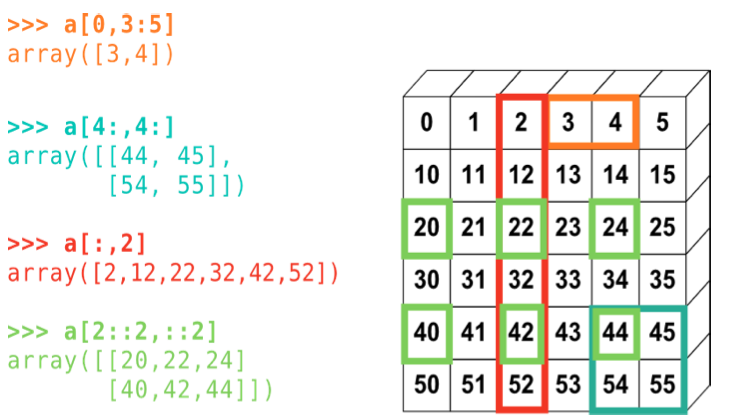

In [45]:
from IPython.core.display import Image 
Image(filename='slicing.png')

## Copies and Views 

A slicing operation creates a __view__ of the original array, not a copy (in contrast, an slice of a list creates a new list). A modification of a view, modifies the original array:

In [46]:
a = np.arange(10)
print (a)
b = a[::2]
print (b)
b[0] = 12
print (b)
print (a)

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[12  2  4  6  8]
[12  1  2  3  4  5  6  7  8  9]


But, if you really need a copy, you can use the `.copy` method:

In [47]:
a = np.arange(10)
print (a)
c = a[::2].copy()
c[0] = 12
print (a)
print (c)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[12  2  4  6  8]


### Indexing with integers

In [49]:
a = np.arange(0, 100, 10)
print (a)
a[[2, 3, 2, 4, 2]]

[ 0 10 20 30 40 50 60 70 80 90]


array([20, 30, 20, 40, 20])

In [50]:
a[[9, 7]] = -100
print (a)

[   0   10   20   30   40   50   60 -100   80 -100]


In [51]:
mask = a>=50
print(mask)
a[mask]

[False False False False False  True  True False  True False]


array([50, 60, 80])

## Numerical operations (or vector computing)

As stated at the beginning, numpy arrays are well suited for the so called numerical computing. In this section we will see some examples to get familiar with this kind of operations. 

In [ ]:
a = np.array([1, 2, 3, 4])
print (a) 
print (a + 1)
print (2*a)

In [ ]:
b = np.ones(4) + 1
print (b)
print(b-a)

Performance comparison:

In [ ]:
a = np.arange(10000)
%timeit a + 1

In [ ]:
l = range(10000)
%timeit [i+1 for i in l]

Take into account that array multiplication should be done through function `np.dot`

# Exercises

## Reading a file
Create a *Reading a two column file*: Make a program who reads a two column file and stores the first column in a list called `x` and the second one in a list called `y`. Then convert the list to arrays and plot them. Test it with some example file.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Reading file with comments
Extend the previous exercise to be able to read a data file with comments. The comment chracter is supposed to be `#`. Every line starting with `#` should be ignored. Test.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Using loadtxt
Improve exercise 1 and 2 by using the `numpy.loadtxt()` function. You should rerad the documentation. Test and compare.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Printing with comments
Write a program which prints tabulated data for a given function, but also printing some comments on it using the `#` character. Use the previous program to make sure you can read back the data.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Kinematics from file

Assume that you are given a file which has printed the values $a_0, a_1, \ldots, a_k$ for the acceleration of a given system at specified intervals of size $\Delta t$, that is, $t_k = k\Delta t$. Your task is to read those values and to compute the velocity of the system at some time $t$. To do that remember that the acceleration can be given as $a(t) = v'(t)$. Therefore, to find $v$, you must integrate the acceleration as

$$v(t) = v(0) + \int\limits_0^t d\tau\ a(\tau).$$
    
If $a(t)$ is only known at discrete points, as in this case, you have to approximate the integral. You can use the trapezoidal rule to get
   
$$v(t_k) \simeq \Delta t \left( \frac{1}{2}a_0 + \frac{1}{2}a_k + \sum\limits_{i=1}^{k-1}a_i \right), 1 \le k \le n-1 .$$
    
Assume that $v(0) = 0$. Your program should: Read the values for $a$ from the array. Then, compute the values for velocity and finally plot the acceleration and the velocity as a function of time. Good test cases for this problem are null values for the acceleration, and constant values for the acceleration, whose theoretical solution you already know. The $\Delta t$ value should be specified at the command line (use the `sys` module to read command line arguments).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()